## DSRM Assignment

Candidate Number : 260771

### Introduction

The purpose of this project is to analyze a dataset containing data on 9 individuals engaging in various physical activities. The dataset is provided in the form of DAT files and includes information from a heart rate monitor and three IMU sensors attached to the hand, chest, and ankle.

Before we could begin our analysis, it was necessary to merge the data for all 9 subjects into a single dataframe to enable efficient processing. The ultimate goal of this assignment is to use the results of our analysis to gain insights on an individual's level of physical activity based on the activities they engage in. To achieve this, we will conduct various methods and algrithms learned in our module.

Requirements to be carried:
1. Carry out thorough exploratory data analysis and appropriately handle missing or dirty data;
2. Develop and test at least one hypothesis for a relationship between a single pair of attributes;
3. Develop and test at least one model which uses multiple attributes to make predictions.

In [1]:
#Importing the libraries we need

import pandas as pd
import numpy as np 
import seaborn as sns
from matplotlib import pyplot as plt
from IPython.display import display
import scipy.stats as stats
from sklearn.metrics import precision_score,recall_score, f1_score, confusion_matrix,roc_auc_score,roc_curve, accuracy_score

To begin, we will load the dataset by storing the file location paths in a list and iterating through them to load each file in a single pass. Because the files do not have any column headers, we have created four lists to define them: three for the IMUs attached to the chest, hand, and ankle, and one for the timestamp, heart rate, and activity ID.

We have also defined a dictionary containing all of the activities to facilitate easy identification of the corresponding activity ID.

Before proceeding with analysis, it is necessary to properly organize the data by defining the appropriate column names and assigning them to the appropriate data. This will allow us to efficiently manipulate and analyze the dataset.

In [2]:
# Loading all our data

file_path = ['Protocol/subject101.dat',
             'Protocol/subject102.dat',
             'Protocol/subject103.dat',
             'Protocol/subject104.dat',
             'Protocol/subject105.dat',
             'Protocol/subject106.dat',
             'Protocol/subject107.dat',
             'Protocol/subject108.dat',
             'Protocol/subject109.dat']

subjectID = [1,2,3,4,5,6,7,8,9]

activityIDdict = {0: 'transient',
                  1: 'lying',
                  2: 'sitting',
                  3: 'standing',
                  4: 'walking',
                  5: 'running',
                  6: 'cycling',
                  7: 'nordic_walking',
                  9: 'watching_tv',
                  10: 'computer_work',
                  11: 'car_driving',
                  12: 'ascending_stairs',
                  13: 'descending_stairs',
                  16: 'vacuum_cleaning',
                  17: 'ironing',
                  18: 'folding_laundry',
                  19: 'house_cleaning',
                  20: 'playing_soccer',
                  24: 'rope_jumping' }

colNames = ["timestamp", "activityid","heartrate"]

IMUhand = ['handtemperature', 
           'handAcc16_1', 'handAcc16_2', 'handAcc16_3', 
           'handAcc6_1', 'handAcc6_2', 'handAcc6_3', 
           'handGyro1', 'handGyro2', 'handGyro3', 
           'handMagne1', 'handMagne2', 'handMagne3',
           'handOrientation1', 'handOrientation2', 'handOrientation3', 'handOrientation4']

IMUchest = ['chestTemperature', 
           'chestAcc16_1', 'chestAcc16_2', 'chestAcc16_3', 
           'chestAcc6_1', 'chestAcc6_2', 'chestAcc6_3', 
           'chestGyro1', 'chestGyro2', 'chestGyro3', 
           'chestMagne1', 'chestMagne2', 'chestMagne3',
           'chestOrientation1', 'chestOrientation2', 'chestOrientation3', 'chestOrientation4']

IMUankle = ['ankleTemperature', 
           'ankleAcc16_1', 'ankleAcc16_2', 'ankleAcc16_3', 
           'ankleAcc6_1', 'ankleAcc6_2', 'ankleAcc6_3', 
           'ankleGyro1', 'ankleGyro2', 'ankleGyro3', 
           'ankleMagne1', 'ankleMagne2', 'ankleMagne3',
           'ankleOrientation1', 'ankleOrientation2', 'ankleOrientation3', 'ankleOrientation4']

columns = colNames + IMUhand + IMUchest + IMUankle  #all columns in one list

In [3]:
df = pd.DataFrame()

for file in file_path: #reading each file from their path
    temp_data = pd.read_table(file, header=None, sep='\s+')
    temp_data.columns = columns
    temp_data['subject_id'] = int(file[-5]) #Adding subject id's to each file to detect which subject's file we are looking at
    df = df.append(temp_data, ignore_index=True)

df.reset_index(drop=True, inplace=True)
df.head()

,timestamp,activityid,heartrate,handtemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,...,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4,subject_id
0,8.38,0,104.0,30.0,2.37223,8.60074,3.51048,2.43954,8.76165,3.35465,...,0.009250,-0.017580,-61.1888,-38.9599,-58.1438,1.0,0.0,0.0,0.0,1
1,8.39,0,NaN,30.0,2.18837,8.56560,3.66179,2.39494,8.55081,3.64207,...,-0.004638,0.000368,-59.8479,-38.8919,-58.5253,1.0,0.0,0.0,0.0,1
2,8.40,0,NaN,30.0,2.37357,8.60107,3.54898,2.30514,8.53644,3.73280,...,0.000148,0.022495,-60.7361,-39.4138,-58.3999,1.0,0.0,0.0,0.0,1
3,8.41,0,NaN,30.0,2.07473,8.52853,3.66021,2.33528,8.53622,3.73277,...,-0.020301,0.011275,-60.4091,-38.7635,-58.3956,1.0,0.0,0.0,0.0,1
4,8.42,0,NaN,30.0,2.22936,8.83122,3.70000,2.23055,8.59741,3.76295,...,-0.014303,-0.002823,-61.5199,-39.3879,-58.2694,1.0,0.0,0.0,0.0,1


Now we have all our data under 1 dataset - df. Now we can go ahead with cleaning the data and make sure we have a clean dataset

### Data Cleaning

In order to properly analyze the dataset, it is necessary to first remove any unnecessary columns. We have got all the details from the documents provided that data labeled with an activity ID of 0 should be discarded as it primarily pertains to transitional activities such as movement between locations or waiting for equipment. It is also worth noting that during these transitory activities, different portions of one subject's recording may be spliced together, resulting in noticeable "jumps" in the heart rate data if the data collection was interrupted for any reason.

Additionally, the accelerometer data should be approached with caution as it is not perfectly calibrated and may become saturated during high-impact movements, such as running. In these cases, it is recommended to use the data from the first accelerometer, which has a scale of ±16g.

By carefully considering and addressing these factors, we can ensure that our analysis is accurate and reliable. By removing unnecessary data and considering the limitations of the data sources, we can more effectively and accurately draw meaningful conclusions from the dataset.

In [4]:
#Dropping columns that are not needed as per above mentioned details

df = df.drop(['handOrientation1', 'handOrientation2', 'handOrientation3', 'handOrientation4',
              'chestOrientation1', 'chestOrientation2', 'chestOrientation3', 'chestOrientation4',
              'ankleOrientation1', 'ankleOrientation2', 'ankleOrientation3', 'ankleOrientation4',
              'handAcc6_1', 'handAcc6_2', 'handAcc6_3',
              'chestAcc6_1', 'chestAcc6_2', 'chestAcc6_3',
              'ankleAcc6_1', 'ankleAcc6_2', 'ankleAcc6_3'],axis = 1)  # removal of orientation columns as they are not needed

In [5]:
#removal of any row of activity 0 as it is transient activity which it is not used

df = df.drop(df[df.activityid == 0].index)
df = df.apply(pd.to_numeric, errors = 'coerce') #removal of non numeric data in cells

In [6]:
#Checking null values in each column
df.isnull().sum()

timestamp                 0
activityid                0
heartrate           1765464
handtemperature       11124
handAcc16_1           11124
handAcc16_2           11124
handAcc16_3           11124
handGyro1             11124
handGyro2             11124
handGyro3             11124
handMagne1            11124
handMagne2            11124
handMagne3            11124
chestTemperature       2420
chestAcc16_1           2420
chestAcc16_2           2420
chestAcc16_3           2420
chestGyro1             2420
chestGyro2             2420
chestGyro3             2420
chestMagne1            2420
chestMagne2            2420
chestMagne3            2420
ankleTemperature       8507
ankleAcc16_1           8507
ankleAcc16_2           8507
ankleAcc16_3           8507
ankleGyro1             8507
ankleGyro2             8507
ankleGyro3             8507
ankleMagne1            8507
ankleMagne2            8507
ankleMagne3            8507
subject_id                0
dtype: int64

From above we can infer that most null values are in Heart rate, followed by values from Hand IMU, ankle IMU and chest IMU

Heart rate is an important variable that is often used to measure physical activity and assess overall health. In this particular data set, we observed a significant number of null values for heart rate. From the documents provided, we determined that the cause of this was the discrepancy in sampling frequency between the IMUs (which have a sampling frequency of 100Hz) and the HR monitor (which has a sampling frequency of approximately 9Hz).

Due to the high sampling frequency of the IMUs, data is collected every 0.01 seconds. However, the HR monitor only samples data approximately every 0.1111 seconds. As a result, for every one reading of heart rate, there are 10 null values.

Given the importance of heart rate as a variable, we decided to use interpolation to fill these null values. Interpolation is a technique that involves constructing a curve that passes through data points, allowing us to estimate values between them. This allows us to better understand the overall trend and patterns in the data, even in the presence of null values.

In [7]:
#Interpolation to fill the missing values in heartrate data
df['heartrate'] = df['heartrate'].interpolate()

In [8]:
#Check if Nan values were filled
df.isnull().sum()

timestamp               0
activityid              0
heartrate               4
handtemperature     11124
handAcc16_1         11124
handAcc16_2         11124
handAcc16_3         11124
handGyro1           11124
handGyro2           11124
handGyro3           11124
handMagne1          11124
handMagne2          11124
handMagne3          11124
chestTemperature     2420
chestAcc16_1         2420
chestAcc16_2         2420
chestAcc16_3         2420
chestGyro1           2420
chestGyro2           2420
chestGyro3           2420
chestMagne1          2420
chestMagne2          2420
chestMagne3          2420
ankleTemperature     8507
ankleAcc16_1         8507
ankleAcc16_2         8507
ankleAcc16_3         8507
ankleGyro1           8507
ankleGyro2           8507
ankleGyro3           8507
ankleMagne1          8507
ankleMagne2          8507
ankleMagne3          8507
subject_id              0
dtype: int64

In [9]:
#filling top 4 Nan values of heart rate with 100
df['heartrate'].fillna(100,inplace = True)

Now that we have used interpolation to fill the null values in the heart rate data, we need to consider the best approach for handling the null values in the other columns. 

Since these columns contain sensory data, interpolation may not be the most appropriate method for filling the null values. Therefore, we will first examine the percentage of null values in each column and determine the most appropriate course of action

In [10]:
#Find the null value percentage for each column
(df.isnull().sum()) / (df.notnull().sum()) * 100

timestamp           0.000000
activityid          0.000000
heartrate           0.000000
handtemperature     0.575852
handAcc16_1         0.575852
handAcc16_2         0.575852
handAcc16_3         0.575852
handGyro1           0.575852
handGyro2           0.575852
handGyro3           0.575852
handMagne1          0.575852
handMagne2          0.575852
handMagne3          0.575852
chestTemperature    0.124713
chestAcc16_1        0.124713
chestAcc16_2        0.124713
chestAcc16_3        0.124713
chestGyro1          0.124713
chestGyro2          0.124713
chestGyro3          0.124713
chestMagne1         0.124713
chestMagne2         0.124713
chestMagne3         0.124713
ankleTemperature    0.439783
ankleAcc16_1        0.439783
ankleAcc16_2        0.439783
ankleAcc16_3        0.439783
ankleGyro1          0.439783
ankleGyro2          0.439783
ankleGyro3          0.439783
ankleMagne1         0.439783
ankleMagne2         0.439783
ankleMagne3         0.439783
subject_id          0.000000
dtype: float64

Since the different columns have varying percentages of null values, we cannot assume that if one set of columns has null values, the other columns will also be null. Therefore, it is necessary to examine the data retention after dropping the rows with null values in order to determine on what needs to be done.

In [11]:
df2 = df.dropna()
(x1,y1) = df.shape
(x2,y2) = df2.shape
(x2 / x1) * 100 #% Data retained after dropping rows with null values

98.89642755673044

The data loss resulting from dropping rows with null values is approximately 1.11%. While this is a small percentage, we determined that it would not significantly impact our data analysis. Additionally, we considered the option of filling the null values using interpolation, but ultimately decided against it as this method may not be suitable for the non-linear data produced by the sensors. Also, it is always best practive to have the clean data set with less interpolation and more real values.

Therefore, we will proceed with dropping the rows with null values

In [12]:
df = df.dropna()

In [13]:
#Check for null values
df.isnull().sum()

timestamp           0
activityid          0
heartrate           0
handtemperature     0
handAcc16_1         0
handAcc16_2         0
handAcc16_3         0
handGyro1           0
handGyro2           0
handGyro3           0
handMagne1          0
handMagne2          0
handMagne3          0
chestTemperature    0
chestAcc16_1        0
chestAcc16_2        0
chestAcc16_3        0
chestGyro1          0
chestGyro2          0
chestGyro3          0
chestMagne1         0
chestMagne2         0
chestMagne3         0
ankleTemperature    0
ankleAcc16_1        0
ankleAcc16_2        0
ankleAcc16_3        0
ankleGyro1          0
ankleGyro2          0
ankleGyro3          0
ankleMagne1         0
ankleMagne2         0
ankleMagne3         0
subject_id          0
dtype: int64

In [14]:
df.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,timestamp,activityid,heartrate,handtemperature,handAcc16_1,handAcc16_2,handAcc16_3,handGyro1,handGyro2,handGyro3,...,ankleAcc16_1,ankleAcc16_2,ankleAcc16_3,ankleGyro1,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,subject_id
count,1921431.00000,1921431.00000,1921431.00000,1921431.00000,1921431.00000,1921431.00000,1921431.00000,1921431.00000,1921431.00000,1921431.00000,...,1921431.00000,1921431.00000,1921431.00000,1921431.00000,1921431.00000,1921431.00000,1921431.00000,1921431.00000,1921431.00000,1921431.00000
mean,1695.39469,8.09330,107.32739,32.76112,-4.93304,3.58102,3.61422,0.00097,0.03963,-0.00322,...,9.38504,-0.17614,-2.59258,0.00808,-0.03399,0.00153,-31.53366,1.38361,17.24152,4.56842
std,1091.50359,6.17625,26.96696,1.79063,6.23144,6.87681,3.95810,1.32601,0.95182,1.59201,...,6.49713,7.68938,3.91012,1.12135,0.63334,1.99215,18.37863,21.68108,19.75140,2.33277
min,31.20000,1.00000,57.00000,24.87500,-145.36700,-104.30100,-101.45200,-28.13540,-17.84950,-14.26470,...,-146.85100,-157.44300,-158.92600,-23.99500,-18.12690,-14.01960,-172.86500,-137.90800,-102.71600,1.00000
25%,739.44500,3.00000,86.00000,31.68750,-8.95410,1.05395,1.16552,-0.37564,-0.22157,-0.37837,...,8.42523,-2.18018,-3.80729,-0.20415,-0.10321,-0.42981,-41.70310,-12.47240,3.69501,2.00000
50%,1467.16000,6.00000,104.00000,33.18750,-5.42106,3.52491,3.44425,-0.00603,0.00591,-0.00560,...,9.53595,-0.29609,-2.41742,0.00458,-0.00382,-0.00225,-33.93250,0.77204,18.75010,5.00000
75%,2654.61000,13.00000,124.00000,34.06250,-0.93589,6.45554,6.54285,0.33148,0.26483,0.36235,...,10.26070,1.76774,-1.04324,0.12721,0.11525,0.08914,-17.76930,17.80170,31.26240,7.00000
max,4245.68000,24.00000,202.00000,35.50000,62.85960,155.69900,157.76000,26.41580,23.07790,14.33840,...,157.23200,156.19000,158.87200,16.44270,13.58820,16.52880,91.55160,94.24780,146.90000,9.00000


Now that we have a clean data set with no null values, we can begin conducting exploratory data analysis to uncover insights and gain a deeper understanding of the data. This will involve applying various statistical and visualization techniques to examine the relationships and patterns present in the data, and help us to identify trends and anomalies that may be of interest or significance

## Exploratory Data Analysis

Exploratory Data Analysis (EDA) is the process of visually and statistically examining and summarising the main characteristics of a data set. The goal of EDA is to understand the underlying structure of the data and uncover any hidden patterns, trends, or relationships. EDA is a critical step in the data science process because it enables analysts to gain a better understanding of the data and identify any potential issues or biases that may affect the results of their analysis. Pandas, Matplotlib, and Seaborn are just a few of the Python libraries and tools available for EDA.

<AxesSubplot:title={'center':'Sample size of each activityid'}, xlabel='activityid'>

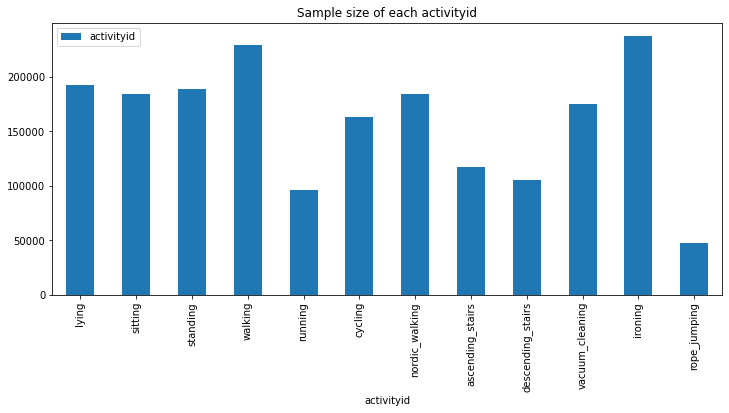

In [15]:
#No of samples for each activity
samples = df.groupby('activityid')[['activityid']].count()
samples.index = samples.index.map(activityIDdict)
samples.plot(kind='bar',figsize=(12,5),title='Sample size of each activityid')

The above chart suggests that the activities of running and rope jumping have the smaller sample sizes compared to other, while the other activities are moderately distributed. 

In order to proceed with exploratory data analysis (EDA), we will first divide our data into a training set and a testing set. A common split in the industry is an 80/20 ratio, with 80% of the data being used for training and 20% for testing. This is the split fraction that we will utilize.

#### Splitting the data to test and train

In [16]:
train_df = df.sample(frac=0.8, random_state=1)
test_df = df.drop(train_df.index)

In [17]:
train_df.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,timestamp,activityid,heartrate,handtemperature,handAcc16_1,handAcc16_2,handAcc16_3,handGyro1,handGyro2,handGyro3,...,ankleAcc16_1,ankleAcc16_2,ankleAcc16_3,ankleGyro1,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,subject_id
count,1537145.00000,1537145.00000,1537145.00000,1537145.00000,1537145.00000,1537145.00000,1537145.00000,1537145.00000,1537145.00000,1537145.00000,...,1537145.00000,1537145.00000,1537145.00000,1537145.00000,1537145.00000,1537145.00000,1537145.00000,1537145.00000,1537145.00000,1537145.00000
mean,1695.32537,8.09499,107.32534,32.76153,-4.92890,3.58001,3.61399,0.00101,0.03929,-0.00361,...,9.38662,-0.17114,-2.59346,0.00871,-0.03400,0.00318,-31.53179,1.37647,17.24832,4.56858
std,1091.58486,6.17628,26.96958,1.79068,6.22880,6.86892,3.95765,1.32526,0.95079,1.59123,...,6.48530,7.70519,3.92387,1.12188,0.63352,1.99409,18.38140,21.67448,19.74353,2.33308
min,31.20000,1.00000,57.00000,24.87500,-145.36700,-104.30100,-101.45200,-28.13540,-17.84950,-14.26470,...,-146.85100,-157.44300,-158.92600,-23.99500,-18.12690,-14.01960,-172.86500,-137.90800,-102.71600,1.00000
25%,739.58000,3.00000,86.00000,31.68750,-8.95264,1.05313,1.16525,-0.37513,-0.22145,-0.37924,...,8.42673,-2.17928,-3.80729,-0.20335,-0.10307,-0.42838,-41.70430,-12.46460,3.72509,2.00000
50%,1466.67000,6.00000,104.00000,33.18750,-5.41884,3.52519,3.44381,-0.00604,0.00580,-0.00558,...,9.53663,-0.29620,-2.41632,0.00463,-0.00378,-0.00220,-33.93430,0.75486,18.74210,5.00000
75%,2654.92000,13.00000,124.00000,34.06250,-0.93367,6.45954,6.54304,0.33096,0.26428,0.36189,...,10.26290,1.76766,-1.04187,0.12761,0.11539,0.08940,-17.76500,17.78180,31.28150,7.00000
max,4245.68000,24.00000,202.00000,35.50000,62.85960,155.69900,157.76000,23.86520,23.07790,14.32670,...,157.23200,156.19000,158.87200,13.63110,11.81970,16.52880,91.55160,94.24780,146.90000,9.00000


The summary statistics of the training data set show that the minimum and maximum values of heart rate are 57 and 202, respectively. It is also noteworthy that 75% of the heart rate values fall below 125. This suggests that the values between 125 and 202 may be associated with high intensity activities.

To further investigate the distribution of heart rate values, we will create a boxplot of the data. This visualization can help us to get a sense of the spread and skewness of the data, and identify any potential outliers or anomalies

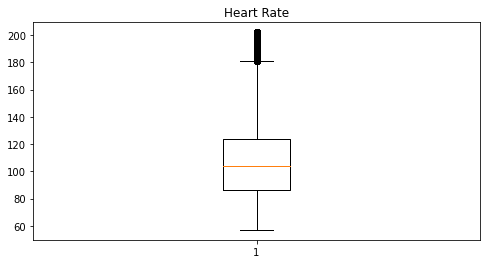

In [18]:
plt.figure(figsize=(8,4))
plt.title("Heart Rate")
plt.boxplot(train_df['heartrate'])
plt.show()

The boxplot reveals that a significant number of heart rate values are concentrated above approximately 175. To ensure that these values are not due to idle activities, we will examine the specific activities that correspond to these heart rate values.

In [19]:
heart_outlier = train_df[train_df['heartrate']>175]
heart_outlier['activityid'].unique()

array([ 5, 24], dtype=int64)

From above, we found that the high heart rate values are not outliers, but rather correspond to the high intensity activities of running and rope jumping. This is to be expected, as such activities would naturally result in elevated heart rate values.

<AxesSubplot:title={'center':'Mean value of heart rate for each activity'}, xlabel='activityid'>

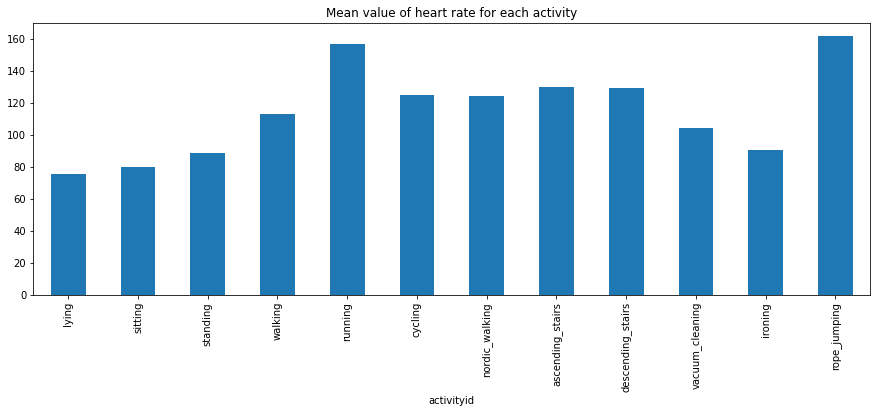

In [20]:
heart_data = train_df['heartrate'].groupby(train_df['activityid']).mean()
heart_data.index = heart_data.index.map(activityIDdict)
plt.title('Mean value of heart rate for each activity')
heart_data.plot(kind='bar',figsize=(15,5))

Next, we will examine the correlations between different variables in order to understand which factors have the strongest relationship with one another. This will provide us with insight into the characteristics of our data and help us to better predict trends and patterns. By understanding the correlations between different variables, we can more accurately analyze and interpret the data.

##### Correlation 
It is a statistical measure that describes the strength and direction of a relationship between two variables. It is expressed as a number between -1 and 1, where a value of 1 indicates a strong positive correlation, a value of -1 indicates a strong negative correlation, and a value of 0 indicates no correlation

Here we are using df.corr function which is used to compute the pairwise correlation of columns in a DataFrame. It returns a DataFrame with the correlations between the different columns. The correlations are computed using the Pearson correlation coefficient, which measures the strength and direction of the linear relationship between two variables. The returned DataFrame can be used to identify relationships between variables and to identify potential correlations that may be used in statistical analyses.

<AxesSubplot:>

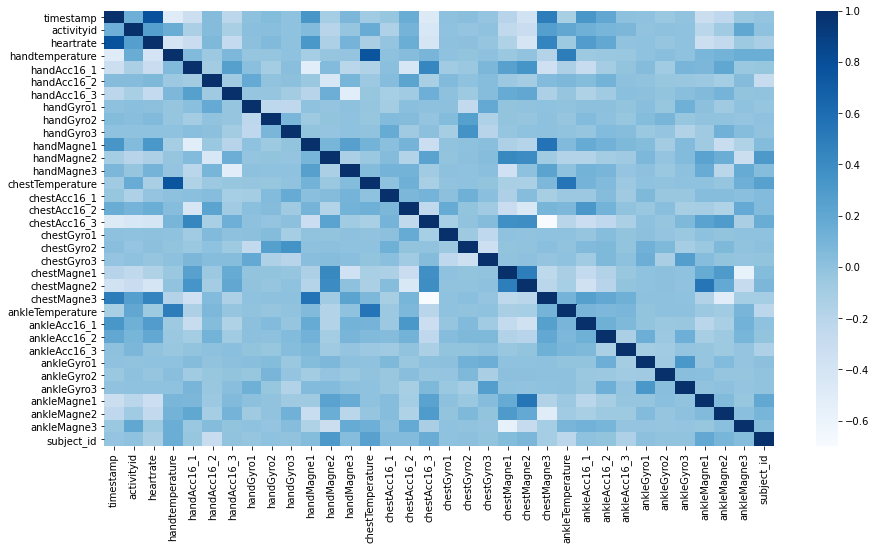

In [21]:
#Finding correlation in the train data set
train_corr = train_df.corr()
plt.figure(figsize=(15,8))
sns.heatmap(train_corr,cmap = "Blues")

The correlation heatmap shows that hand temperature and chest temperature are highly correlated, which is expected given that they are both temperature sensors attached to the body. 

The gyroscopes do not appear to have a strong correlation with any other variable. 

The hand accelerometer and magnetometers have a loose correlation in all three instances, but the correlation is not particularly strong. On the other hand, the heart rate and chest magnetometer 3 exhibit a very high correlation

Text(0.5, 1.0, 'Heart Rate & Chest Magnetometer')

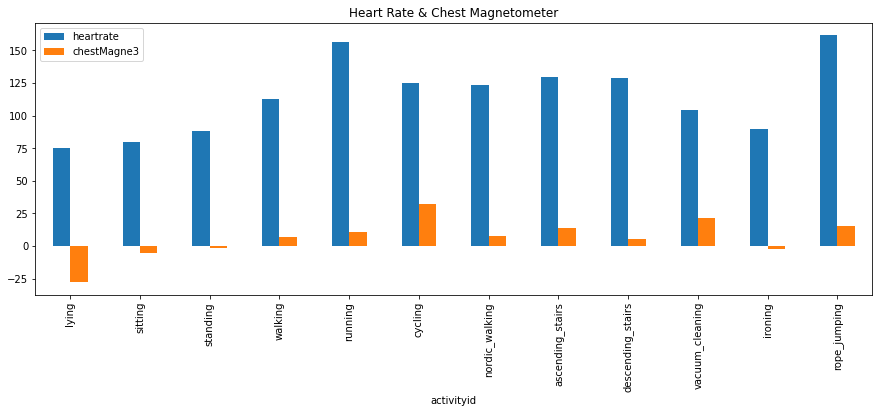

In [22]:
#Plot chart for the high correlation variable of heart rate and magnetometer to see their trend
heart_chest_data = train_df.groupby(train_df['activityid'])[['heartrate','chestMagne3']].mean()
heart_chest_data.index = heart_chest_data.index.map(activityIDdict)
heart_chest_data.plot(kind='bar',figsize=(15,5))
plt.title('Heart Rate & Chest Magnetometer')

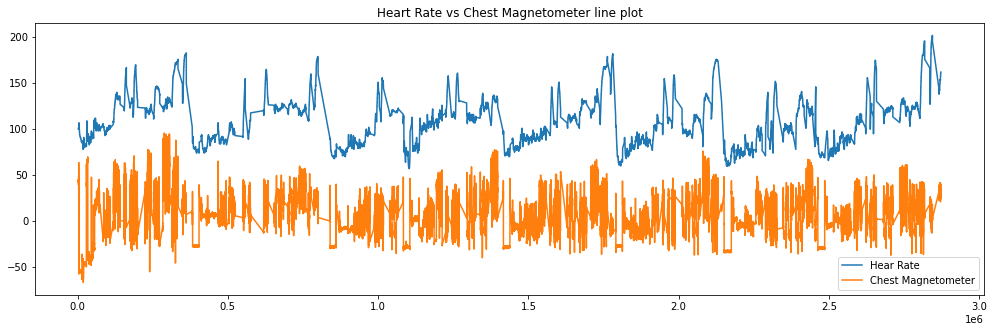

In [23]:
plt.figure(figsize=(17,5))
plt.title('Heart Rate vs Chest Magnetometer line plot')
plt.plot(test_df['heartrate'], label = 'Hear Rate')
plt.plot(test_df['chestMagne3'], label = 'Chest Magnetometer')
plt.legend()


The preceding charts clearly demonstrate a strong correlation between heart rate values from the HR monitor and chest magnetometer sensor values. The chart above illustrates the similarity in patterns between the two variables

### Hypothesis Testing

A Hypothesis test is a statistical procedure that helps to determine whether or not a hypothesis about a population is true or false. It allows for the selection of data to be collected and analyzed by comparing it to the predicted results of the initial hypothesis.

The process of hypothesis testing consists of three steps: stating the null hypothesis, stating the alternative hypothesis, and deciding which hypothesis to accept based on the collected data. The null hypothesis assumes that there is no significant difference between the expected and observed results. The alternative hypothesis assumes that there is a significant difference.

To determine which hypothesis to accept, a statistical test is used to calculate a p-value, which is the probability that the observed results occurred by chance if the null hypothesis is true. If the p-value is less than a predetermined level of significance (alpha level), then the null hypothesis is rejected in favor of the alternative hypothesis. If the p-value is greater than the alpha level, then the null hypothesis is accepted.

For our hypothesis we will be focusing on the Heart Rate values. As this looks likes the best component to focus on, considering it's relevance and importance in a human being's body.
Before we begin, let us look at the distribution of the data. For Hypothesis we will be working with our test data set

(array([19693., 73566., 82852., 59229., 78963., 32610., 16241., 12033.,
         7575.,  1524.]),
 array([ 57. ,  71.5,  86. , 100.5, 115. , 129.5, 144. , 158.5, 173. ,
        187.5, 202. ]),
 <BarContainer object of 10 artists>)

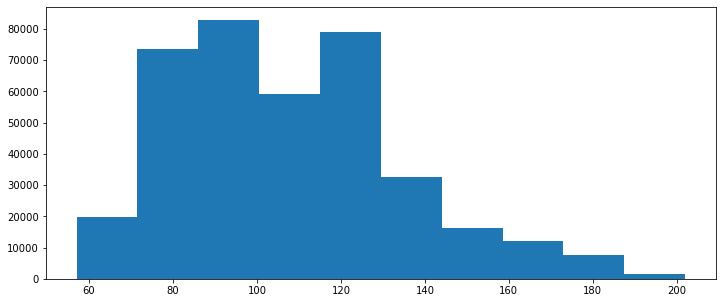

In [24]:
#Using the test dataset for hypothesis testing
#Visualizing the heartrate distribution
plt.figure(figsize=(12,5))
plt.hist(test_df['heartrate'])

In [25]:
test_df['heartrate'].skew()

0.6529861234973793

From the above data, we can observe that the data distribution is slighly right skewed, but not a lot. Hence we can ignore this
Since we also know that 75% of heart rate values lie below 124, It will not impact our hypothesis much

Let’s say we are interested in determining whether a person's heart rate is significantly higher when they engage in multiple activities compared to when they are only standing or walking..

$H_{0} = u$ = Mean heartrate of a person doing multiple activities and of a person who is only standing and walking is nearly same

$H_{1} = u$ > Mean heartrate of a person while doing multiple activities is greater than a person who is just standing and walking heartrate

In [26]:
#Create a sample data set for only Standing and Walking data
stand_walk = test_df[(test_df['activityid']==3) | (test_df['activityid']==4)]

In [27]:
#Hypothesis testing

P_G = ((test_df['heartrate'].mean())-stand_walk['heartrate'].mean())/(test_df['heartrate'].std()/np.sqrt(test_df['heartrate'].count()))
p_value = (1-stats.norm.cdf(P_G))

print('Mean heartrate value from data: ',test_df['heartrate'].mean())
print ('one tail p value from normal: ', p_value)  

Mean heartrate value from data:  107.3355492951822
one tail p value from normal:  0.0


In [28]:
if p_value > 0.05:
    print("The p_value is ", p_value, " hence H1 is rejected. Mean heartrate of a person doing multiple activities and of a person who is only standing and walking is nearly same.")
else:
    print("The p_value is ", p_value, " hence H0 is rejected. Mean heartrate of a person while doing multiple activities is greater than a person who is just standing and walking heartrate")

The p_value is  0.0  hence H0 is rejected. Mean heartrate of a person while doing multiple activities is greater than a person who is just standing and walking heartrate


#### Bootstrapping

Bootstrapping is a statistical method for estimating the distribution of a statistic by resampling a data set with replacement. It is often used as a way to approximate the sampling distribution of a statistic when the underlying distribution is unknown or difficult to model. In bootstrapping, the original data set is randomly resampled multiple times, and for each resampling, a statistic of interest is computed. The resulting distribution of the statistic is then used to make inferences about the population

In [29]:
import random
random.seed(11)
def bootstrap_sample(data):
    return [random.choice((data)) for _ in data]

In [30]:
test_sample = np.array(test_df['heartrate'])

test_bsmean=[]
for i in range(101): #Create 101 bootstrap samples
    bs=bootstrap_sample(test_sample)
    test_bsmean.append(np.mean(bs))

bsmean_array=np.array(test_bsmean)
print ("Bootstrapped Mean: ", np.mean(bsmean_array))
print ("Bootstrapped CI Lower bound: ", np.percentile(bsmean_array,2.5))
print ("Bootstrapped CI Upper bound: ", np.percentile(bsmean_array,97.5))

Bootstrapped Mean:  107.33243447883628
Bootstrapped CI Lower bound:  107.24887365429483
Bootstrapped CI Upper bound:  107.40351174937814


(array([ 4.,  5., 10.,  7., 18., 17., 19., 11.,  7.,  3.]),
 array([107.23268949, 107.25164041, 107.27059132, 107.28954224,
        107.30849315, 107.32744407, 107.34639498, 107.3653459 ,
        107.38429682, 107.40324773, 107.42219865]),
 <BarContainer object of 10 artists>)

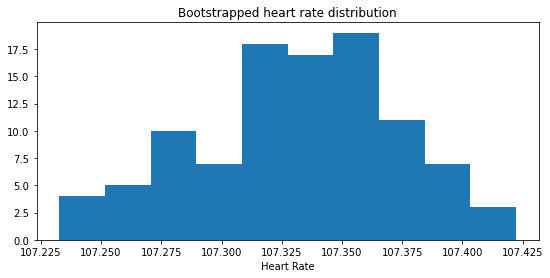

In [31]:
#Check the distribution of the bootstrapped values
plt.figure(figsize=(9,4))
plt.title('Bootstrapped heart rate distribution')
plt.xlabel('Heart Rate')
plt.hist(test_bsmean)

In [32]:
#Compare the bootstrapped values with the normal values generated
stats.norm.interval(alpha = 0.95,loc=np.mean(test_df['heartrate']),scale=stats.sem(test_df['heartrate']))

(107.25032091856207, 107.42077767180234)

Through the process of bootstrapping and comparing confidence interval values to normal values, we find that our confidence interval is very small. This is due to the large sample size and small variance, which reduces uncertainty about the estimate of the population parameter and leads to a narrow confidence interval. 

It is worth noting that a small confidence interval does not necessarily mean that the estimate of the population parameter is more accurate; it simply indicates that there is less uncertainty about the estimate.

### Modelling

Data modeling is the process of creating a mathematical representation of a real-world system or process. In Python, data modeling is typically used for prediction or classification tasks, where the goal is to build a model that can make accurate predictions or classifications based on input data.When selecting a model, it is important to consider the best-fitting model, which is the model that accurately represents the relationships and patterns in the data. The best-predicting model, on the other hand, is the model that makes the most accurate predictions based on the data.

In order to evaluate the fit of a model, analysts often use goodness of fit (GOF) measures, which are statistics that quantify the difference between the observed data and the model's predicted values. There are many different GOF measures, each with its own strengths and limitations.

Another factor to consider when selecting a model is the fit to noise and fit to regularity. The fit to noise refers to the ability of the model to accurately represent the random fluctuations or noise in the data. The fit to regularity refers to the ability of the model to capture the underlying patterns and trends in the data.

Ultimately, the goal is to select the simplest model that describes the data sufficiently well. This is often referred to as the principle of parsimony, which states that the most parsimonious (simple) model that fits the data is the most likely to be true. This is important because simpler models are easier to interpret and are less prone to overfitting, which is when a model is overly complex and performs poorly on new, unseen data.

It's a good practice to remove any unnecessary columns or variables from the data set before building a model. This can help to reduce noise and improve the model's performance.

It's also important to carefully select the features (columns) that you include in the model. Including too many features can lead to overfitting, where the model becomes too complex and performs poorly on new, unseen data. On the other hand, including too few features can result in underfitting, where the model is too simple and cannot accurately capture the relationships and patterns in the data.

In this step, we will remove the timestamp and subject ID columns from the test and training data sets. Since we have already split the data into an 80:20 ratio, we do not need to perform another split.

In [33]:
train_df_model = train_df.drop(["timestamp", "subject_id"],1)
test_df_model = test_df.drop(["timestamp", "subject_id"],1)

##### Logistic Regression

Logistic regression is a machine learning algorithm used for classification tasks. It is a supervised learning algorithm, which means that it requires labeled training data in order to learn the relationship between the input features and the target variable. We are considering using a logistic regression model for this data, as it is a simple model that is well-suited to handling labeled data sets.

First, we will be scaling our data in order to help with the logistic regression

Scaling is a preprocessing step. It involves transforming the input features so that they have a similar scale and range of values. It is beneficial for our algorithms which sensitive to the scale of the input features

There are several reasons why scaling may be helpful for logistic regression:
1. Improved model performance 
2. Improved interpretability
3. Reduced sensitivity to outliers

In [34]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler

#apply scaling to all columns except activity 
scaler = RobustScaler()
df_scaled = train_df_model.copy()
df_scaled_test = test_df_model.copy()

df_scaled.iloc[:,1:31] = scaler.fit_transform(df_scaled.iloc[:,1:31])
df_scaled_test.iloc[:,1:31] = scaler.fit_transform(df_scaled_test.iloc[:,1:31])

df_scaled.head()

,activityid,heartrate,handtemperature,handAcc16_1,handAcc16_2,handAcc16_3,handGyro1,handGyro2,handGyro3,handMagne1,...,ankleTemperature,ankleAcc16_1,ankleAcc16_2,ankleAcc16_3,ankleGyro1,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3
568759,13,-0.368421,0.289474,0.618868,0.165108,-1.424204,0.343442,1.851522,3.890449,-0.303837,...,0.750000,3.832200,1.472992,0.721628,-0.704712,4.451336,-4.647660,-0.318100,0.130629,-33.45420
1803375,1,-1.078947,0.105263,1.280799,-0.678185,0.883593,-0.029107,-0.055243,0.007598,-0.235272,...,0.333333,-5.263116,-2.342498,-0.311219,0.099414,0.089342,0.007084,0.715647,0.844307,-4.21278
436494,3,-0.315789,0.342105,-0.498447,-0.072418,-0.403471,0.566487,-0.528877,-0.234033,0.149723,...,0.458333,0.191524,-0.120839,0.362097,0.096885,-0.433675,0.192140,0.369681,0.650327,36.01870
173773,13,0.578947,0.263158,0.629693,0.770214,0.334541,-0.447691,0.477999,0.005780,-1.108040,...,0.541667,-0.155977,-0.743208,0.030339,-0.006761,-0.064493,0.019989,-0.264761,0.229962,20.03980
1040942,4,0.289474,-0.894737,-0.668136,-0.348886,-0.148682,-0.614695,-5.161549,4.372791,0.244660,...,0.375000,-0.071486,-0.050176,-0.086858,-1.493025,-0.428556,-0.738557,-0.127284,0.688672,21.64620


A robust scalar is a statistical measure that is resistant to the effects of outliers in the data. It is used to summarize the central tendency of a dataset, similar to the mean or median, but is less sensitive to extreme values. Some examples of robust scalars include the interquartile mean and the trimmed mean. These measures exclude a certain percentage of the data from the calculation, such as the lowest and highest 25% of values, in order to reduce the influence of outliers. Robust scalars are useful in situations where the data may contain a few extreme values that could skew the results if the standard mean or median were used.

In the scaling process, I experimented with StandardScalar, MinMaxScalar, and RobustScalar. Only the RobustScalar method worked in my case, as the other techniques exceeded the maximum number of iterations (max_iter) allowed.

Reference : https://scikit-learn.org/stable/modules/preprocessing.html

In [35]:
#Train dataset
X_train = df_scaled.drop('activityid', axis=1).values
y_train = df_scaled['activityid'].values

# Test Dataset
X_test = df_scaled_test.drop('activityid', axis=1).values
y_test = df_scaled_test['activityid'].values

In [36]:
from sklearn.decomposition import PCA
pca = PCA(n_components=7) #95% variance was observed at 7 components level
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.fit_transform(X_test)

While testing various solver methods for logistic regression, I found that the 'saga' solver performed the best. This is likely due to its ability to efficiently handle large data sets and its relatively fast computation time compared to other methods.

Reference :https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

In [37]:
from sklearn.linear_model import LogisticRegression
LogReg = LogisticRegression(solver = 'saga') #Solver 'saga' works well for large data set
LogReg.fit(X=X_train_pca, y=y_train)

LogisticRegression(solver='saga')

In [38]:
y_prediction = LogReg.predict(X_test_pca)

In [39]:
print('accuracy score :',accuracy_score(y_test, y_prediction))
print('precision score :',precision_score(y_test, y_prediction,average=None).mean())
print('recall score :',recall_score(y_test, y_prediction, average=None).mean())
print('f1 score :', f1_score(y_test, y_prediction, average=None).mean())

accuracy score : 0.3049291413166236
precision score : 0.3133171380757902
recall score : 0.2344015818703894
f1 score : 0.18972575635897646


The accuracy score for our model was only 30%. This means that our predictions will be accurate 30% of the time, indicating that the logistic regression model is not the most appropriate for our data. We will therefore consider alternative supervised models.

There are many supervised machine learning models that are not logistic regression. Here are a few examples:

    Decision trees
    Random forests
    K-nearest neighbors (KNN)

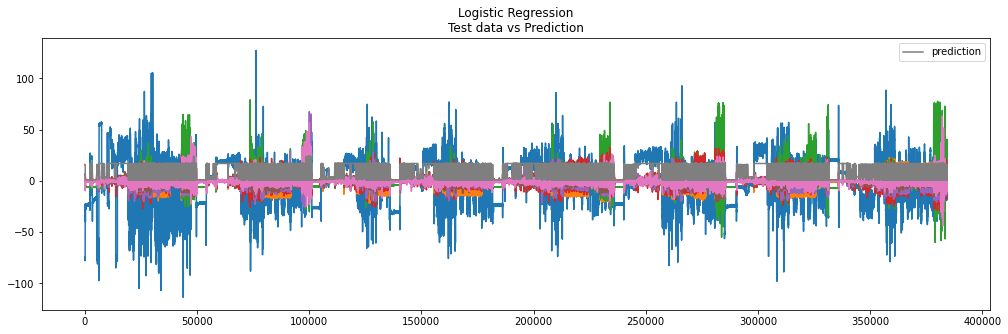

In [40]:
plt.figure(figsize=(17,5))
plt.plot(X_test_pca)
plt.plot(y_prediction,label='prediction')
plt.title('Logistic Regression\nTest data vs Prediction')
plt.legend()
plt.show()

##### Random Forest Classifier

Random Forest is a supervised machine learning algorithm that is used for classification and regression tasks. It is an ensemble method, which means that it combines the predictions of multiple models to make a final prediction.

In a Random Forest classifier, a large number of decision trees are trained on randomly selected subsets of the training data. Each tree makes a prediction, and the final prediction is made by aggregating the predictions of all the trees. This process is repeated several times to improve the accuracy of the model.

One advantage of Random Forest is that it is less prone to overfitting than a single decision tree. It is also relatively simple to implement and can handle large and complex data sets. In Python, Random Forest classifiers can be implemented using the scikit-learn library.

In [41]:
from sklearn.ensemble import RandomForestClassifier
Forrest = RandomForestClassifier(n_jobs =4)
Forrest.fit(X_train,y_train)
y_forrest_pred = Forrest.predict(X_test)

In [42]:
print('accuracy score :',accuracy_score(y_test, y_forrest_pred))
print('precision score :',precision_score(y_test, y_forrest_pred,average=None).mean())
print('recall score :',recall_score(y_test, y_forrest_pred, average=None).mean())
print('f1 score :', f1_score(y_test, y_forrest_pred, average=None).mean())

accuracy score : 0.9998620818869279
precision score : 0.9998428999792499
recall score : 0.9998511892070866
f1 score : 0.9998470273852615


Here we can see that our model has achieved an accuracy score of 99.9%, which is exceptionally high. This suggests that the model is able to accurately predict the outcome of the data with a very high degree of accuracy. We can also deduce that, in this case, a simple model that fits the data well is more advantageous than a complex model that does not perform as well.

it's important to choose a model that is both accurate and simple. A model with a high accuracy score is usually a good choice, as long as it is not overfitting the data. Overfitting occurs when a model is overly complex and performs well on the training data, but poorly on new, unseen data.

If you have a simple model that fits your data well, it is likely to be more generalizable and more robust than a complex model that does not fit the data as well. This is because a simple model is less prone to overfitting and is easier to interpret and understand.

Random Forest is a popular choice for classification tasks because it can handle large and complex data sets and is less prone to overfitting than a single decision tree. It is also relatively simple to implement.

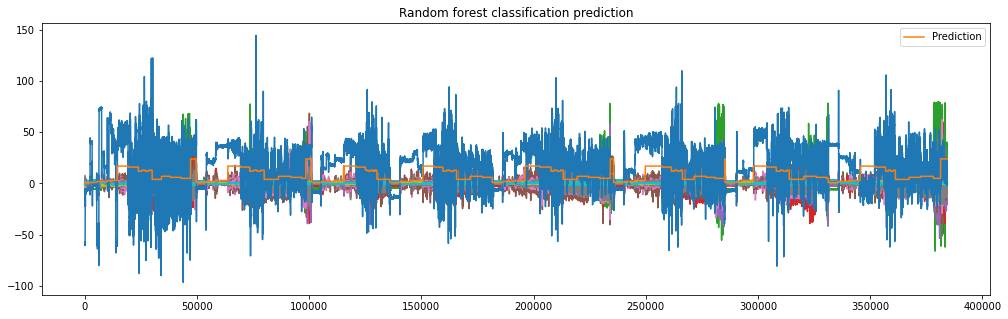

In [43]:
plt.figure(figsize=(17,5))
plt.title('Random forest classification prediction')
plt.plot(X_test)
plt.plot(y_forrest_pred,label='Prediction')
plt.legend()
plt.show()

### Summary

In this assignment we were able to answer all 3 requirements mentioned in the question.
We have done the following tasks successfully :
1. Exploratory Data Analysis - Dig in the data, carried out thorough exploratory data analysis and appropriately handled missing and dirty data.
2. Hypothesis Testing - Tested a hypothesis for a relationship between a single pair of attributes
3. Data Modelling - Developed and tested at 2 models using multiple attributes to make predictions.